In [1]:
import numpy as np
import matplotlib.pylab as plt
from pylab import *
import sys
import pandas as pd

In [2]:
##########################
# define a few constants #		##fft python random phase
##########################

e0 = np.loadtxt('837nm.dat')		#load the reference pulse, pump @836 nm
e0 = e0.T
e1 = np.sqrt(e0[1])
e1_ph = e0[2]
e = np.array(e1)*np.exp(-1j*(np.array(e1_ph)))		#reforming E-field

original_trace = np.loadtxt('trace/trace1.frg')		#load FROG trace from experiment

N = len(e0[0])		#timesteps
N_max = np.max(e0[0])
N_min = np.min(e0[0])

t = e0[0]-N_min
T0 = N_max-N_min	#total time duration
dt = T0/(N-1)
df = 1.0/T0		#frequency steps
TD = N			#time delay for FROG-trace generation
freq = np.arange(0,1/dt+df,df)*1000

In [21]:
original_trace.shape

(128, 128)

In [4]:
## for generation of Gaussian pulses
def gaussian_pulse(T,f,A,phase,tau):
	w0 = f*2*np.pi		#central angular frequency of pulse
	temp = -1j*w0*(t-tau) + 1j*phase
	E = A*np.sqrt(np.exp(-4.0*np.log(2.0)/np.log(np.e)*((t-tau)/T)**2))*np.exp(-temp)
	return E

In [5]:
## calculate cross correlation of two pulses
def xcorr(e0,e,td):		#shift one pulse by time delay of 'td'
	E_delay = e*1.0
	if td<=0:
		E_delay[0:N+td] = e0[-td:]
		E_delay[N+td:] = [0]*(-td)
	else:
		E_delay[0:td] = [0]*(td)
		E_delay[td:] = e0[0:N-td]	
	return  e*E_delay

In [6]:
## calculate the differert of trace A and trace B
def array_diff(A,B):
	A = A/np.max(A)
	B = B/np.max(B)
	return np.sum(np.square(A-B))/np.sum(np.square(A))

In [7]:
def FROG_generator(e,E,TD):	
	FROG = np.zeros((TD,N),dtype=float)
	for td in range(-TD//2,TD//2):
		E_corre = xcorr(e,E,td)
		temp0 = np.fft.fftshift(np.fft.fft(E_corre))
		FROG[(td+TD//2)-1] = abs(temp0)**2	
	return FROG.T

In [8]:
## plot out FROG trace
def FROG_trace_plot(FROG):
	fig,ax = plt.subplots()
	plt.imshow(FROG)
	plt.title("FROG trace")
	plt.grid(True)
	plt.show()

In [9]:
## calculate FROG traces with different time delays
def FROGs(T1,T2,A1,A2,f0,f1,tau1):
    tau2 = tau1-700
    phase1 = a2*(t-tau1)**2+a3*(t-tau1)**3
    phase2 = a2*(t-tau2)**2+a3*(t-tau2)**3 
    E1 = gaussian_pulse(T1,f0,A1,phase1,tau1)
    E2 = gaussian_pulse(T2,f1,A2,phase2,tau2)
    E = E1+E2
    FROG = FROG_generator(e,E,TD)
    delta = array_diff(FROG, original_trace)	
    return FROG, delta

In [22]:
######################
# initial parameters #
######################

T1 = np.arange(300,1000,100)		#Gaussian pulse duration in fs, FW
T2 = np.arange(300,1000,100)
A1 = np.arange(0.6,1.5,0.1)			#Amplitude of Raman pulse
A2 = np.arange(0.6,1.5,0.1)			#intensity dependent factor ##it is not used in this program, ignore it.

a2 = 2.50*10**-6	#second order phase factor
a3 = 3.0*10**-9		#third order phase factor

F0 = 1.600/1000.0	#Raman center-wavelength
F1 = 0.25/1000.0	#Red-shifted center-wavelength
			
i0 = 333.0		#unit: fs
Tau1 = T0/2+i0-400	#Raman pulse peak time
#tau2 = tau1-700		#Red-shifted pulse peak time

In [23]:
values = pd.DataFrame(columns = ['T1', 'T2', 'A1', 'A2', 'F0', 'F1', 'Tau1'])
values

,T1,T2,A1,A2,F0,F1,Tau1


In [24]:
###########################
# FROG trace main program #
###########################
FROGS = []
for t1 in T1:
    for t2 in T2:
        for ai1 in A1:
            for ai2 in A2:
                (FROG, delta) = FROGs(t1,t2,ai1,ai2,F0,F1,Tau1)
                print(delta)
                values = values.append({'T1':t1, 'T2':t2, 'A1':ai1, 'A2': ai2, 'F0':F0, 'F1':F1, 'Tau1':Tau1}, ignore_index=True)
                FROGS.append(FROG)

0.3586872492469046
0.31582647446874573
0.31801352685684686
0.3385949343349909
0.3658262381329755
0.39364194603898583
0.41941568376479754
0.4423818981773134
0.4625958387572385
0.4666840800825924
0.3586872492469045
0.3180128149099162
0.314825206480769
0.3284294698886613
0.34990941674842657
0.3738755269805622
0.3974824967858084
0.4194156837647975
0.5919915795943513
0.4493484899656567
0.3586872492469046
0.32017545822105853
0.3136161320172428
0.3220098179609164
0.3385949343349908
0.3588019533970055
0.37988189560366514
0.7083552268906663
0.5563803317309074
0.43673509822377243
0.3586872492469045
0.3221858437944995
0.3135019889934815
0.3180135268568468
0.330553490823337
0.3473275591967466
0.8070333303335036
0.6604140844793654
0.5293620311741604
0.4270977772662802
0.35868724924690454
0.324009907724583
0.3139966564077752
0.3156071441444666
0.3248484360358868
0.887540506701512
0.7529515735517169
0.6224765822537303
0.508316900894967
0.419514956438323
0.35868724924690454
0.3256496005503541
0.314824

0.5950246910545289
0.6754725187549032
0.7432014026690852
0.7982712511483798
0.842573288306656
0.8819149236290983
0.915469485580147
0.4093861023415863
0.4562956641440816
0.5313960294771229
0.6104621487465033
0.6821793184578925
0.7432014026690851
0.7937425314101637
0.8352211396435898
0.871572356215674
0.4071961578248367
0.42338652717630054
0.4796907296638122
0.5514222212051106
0.6230851502710401
0.6876845959520634
0.7432014026690852
0.7898993666979094
0.8288677934650021
0.4438135605856044
0.4079189968638995
0.44179961648338817
0.5010386420107149
0.568332360554853
0.6335746201443039
0.692283164358533
0.7432014026690844
0.7865975409388718
0.5044739217820994
0.4071961578248367
0.41796837574372825
0.4610939506986783
0.5200163007681892
0.5827064691683874
0.642415968810108
0.6961810899553641
0.7432014026690851
0.8256718764244274
0.9094180337450637
0.9665995929324994
1.006546434471176
1.035240628759098
1.0564075566787587
1.0756630932657107
1.0915234147992137
1.1042727524061864
0.723612798493693

0.4550671497238514
0.5484163026950197
0.6523821565092344
0.738674441535006
0.8056884277439192
0.8569949318569586
0.8964760235849623
0.9272265247527712
0.9515177989641811
0.9709800823829681
0.46042016293281207
0.54841630269502
0.638429581974174
0.7160869289604076
0.7791327355945071
0.8293601379188197
0.8693297906159853
0.9013423131523416
0.9272265247527715
0.41788146187380476
0.47027562248614013
0.54841630269502
0.6277219043834628
0.6980639635084382
0.7571249045766378
0.8056884277439191
0.8454175001369525
0.8779992859041544
0.4377022815528106
0.4254271740010212
0.4782886753553098
0.5484163026950202
0.6192580021981675
0.6833973264622554
0.738674441535006
0.7853002443878657
0.8243320936703837
0.5414210322464165
0.41268560836486384
0.43345043419588697
0.4848846993759443
0.54841630269502
0.612406442338212
0.6712571208925155
0.7230348053212122
0.7676287727077796
0.652028634128217
0.48023147759226176
0.41407052354549734
0.4411431069162224
0.49038760941660103
0.5484163026950197
0.6067505342935

0.3707198529961891
0.36357522425650995
0.37925959227676476
0.4057016755926743
0.4376459056869783
1.115370100678675
0.9271617592849066
0.7439803584457942
0.5831343000168011
0.45709651148305247
0.3707198529961892
0.3629034929863693
0.37542867479732783
0.39775285114000075
1.2058371462762911
1.037505976404623
0.864639204537389
0.7010721823893363
0.5594800750270331
0.448373340297693
0.3707198529961892
0.36245670201300456
0.37253185955235374
1.2785885879923407
1.1295409003682215
0.9708141590645628
0.8126778419868304
0.6660527755704825
0.540262900366514
0.4412108530340548
0.3707198529961892
0.3621612946078546
1.3374385280063763
1.2058371462762911
1.0621412229215612
0.9136937529309732
0.7691535799405692
0.6370819550897033
0.5243891517820939
0.4352310973375799
0.3707198529961892
0.406523097433269
0.4657733145153584
0.5410700931063995
0.6125938217166832
0.6738635406433926
0.724318690305205
0.7653516542284977
0.798711504875372
0.8259761413661547
0.4247159807283666
0.40652309743326903
0.4556275913

1.1528829724251568
1.0478900064578052
0.9435198183532516
0.8427163079667295
1.6328356462564861
1.5682334044619766
1.4951147604344501
1.4142574873973726
1.3267642176782373
1.2340760618248483
1.1379481198962969
1.0403822282378474
0.9435198183532527
0.6492151407468952
0.45299485657788285
0.3386436950732636
0.3233686298888788
0.3383713560894622
0.36481734144833255
0.3957105111112116
0.427008093621809
0.45665873352023056
0.8719692217458862
0.6492151407468953
0.47602330863659914
0.3632668217579941
0.3229088241367575
0.32780465339721826
0.3451297789525293
0.3690803147414972
0.39571051111121175
1.0558909246814099
0.84221005155888
0.649215140746895
0.49442113530444615
0.38583226156331824
0.3257541622654146
0.3233686298888788
0.3331982921187791
0.3506808028937828
1.1988065186614782
1.007746499296188
0.8193585881784231
0.6492151407468952
0.5093944930288895
0.4059237003676248
0.3386436950732635
0.3226184958460724
0.32652264243805623
1.3082866322563753
1.1421589013641962
0.9693371405310564
0.801284

0.7598713430578724
0.8184824899472616
0.8677194914778255
0.9088305474270438
0.6791517452632914
0.4913345316934573
0.47973614257743263
0.5371515229463146
0.6060879643955756
0.6749567460729404
0.7381235799320119
0.7936482620680638
0.8414562483028386
0.8290600307180256
0.6138508787414654
0.4642956214703657
0.48448219245837304
0.5371515229463146
0.5990599045428263
0.6615262719278985
0.719936805849024
0.7723863096815878
0.9652502748385581
0.7444282670999712
0.56598737877548
0.4573469639604621
0.48856997901619204
0.537151522946315
0.5933112535648195
0.6503794599081949
0.7045534871827513
1.0828492426374101
0.8697205869233746
0.6791517452632919
0.5301198306365887
0.46086079390381773
0.4921083131711086
0.5371515229463146
0.5885255864545559
0.6409962192743659
1.1819762420306736
0.9832215900159588
0.7925067152405968
0.628274807095802
0.5026755720166816
0.46442109105680346
0.49519076963008224
0.537151522946315
0.5844819993584496
1.2647381046249633
1.0828492426374112
0.899339682116497
0.73000385511

0.8785650587597956
0.7192683237606619
0.5831767285461541
0.4761422169649438
0.40741077418940047
0.42039533414334734
1.456718190420429
1.3103303888780606
1.1516651038509873
0.9888184748648627
0.8311922816862581
0.6878860901722216
0.5660264710375114
0.46967283562960016
0.40741077418940047
0.4454334943714274
0.5153903533168432
0.6022563068746691
0.6848203354963229
0.755797354436752
0.8144434263983951
0.8622747057831656
0.9012592877474056
0.933194818692346
0.5089113181497855
0.4454334943714276
0.5036292298712045
0.577282704089743
0.6506491000501397
0.716787881273727
0.77376541312495
0.8218930578592566
0.8622747057831652
0.684889787112489
0.48594956734689376
0.44543349437142754
0.49506771993486187
0.5584607974843137
0.6237576814016741
0.6848203354963228
0.7392403532532053
0.7865904407025918
0.8607917737935661
0.6332196857171726
0.46937351294602947
0.4454334943714275
0.48859292166109086
0.543892896688698
0.6022563068746689
0.6584206235535347
0.7098829772984185
1.0167867978188667
0.7871350851

0.37811647508899004
0.4127664263809264
0.45878977349438305
0.5079393694663222
0.555566071482001
0.5994714104314974
0.9516625264190972
0.7155586336417197
0.5253071308306154
0.39534532923130494
0.37258795445447795
0.3978642935101089
0.434967788739824
0.47717149671724
0.5201075540047845
1.1206809505548954
0.8965507499334807
0.6917431865833166
0.5253071308306155
0.40674213262458875
0.369439728269813
0.3877226516443707
0.4175050251326656
0.45340570673879343
1.2547578149003766
1.052788521799081
0.8533290499752104
0.6731306190031278
0.5253071308306155
0.41639607904765147
0.3677253300161609
0.380749039101028
0.4045895531677946
1.3601005067359995
1.182099827973594
0.9974131391175703
0.8186767097964891
0.6582041031857208
0.5253071308306156
0.42465328302855676
0.3668956282995373
0.3759255731570658
1.4431958778204552
1.287488677758156
1.1206809505548951
0.9516625264190974
0.7903617055294971
0.6459787618691025
0.5253071308306155
0.4317826065137384
0.36662097338671046
1.5093799760044355
1.3731944262

1.6036371524863982
1.5046498195376456
1.3953847752231945
1.2780404524696336
1.1554947075733797
1.031179902853658
0.9088382667372407
0.792190014010802
0.6845765674887474
1.645414782535006
1.5593395043807512
1.463736581637429
1.3600184595833251
1.2501048919626028
1.1363928960244447
1.0216504893308291
0.9088382667372407
0.8008812464960066
1.679139626489026
1.603637152486398
1.5194625912872208
1.4275371330522524
1.3291502833410849
1.2259681305682673
1.1199962631378069
1.01349303873321
0.9088382667372399
0.7178449806335402
0.5012530832090533
0.36229266712907976
0.3294433071225374
0.347391820047365
0.37866736704251613
0.415480205774407
0.45406566748382565
0.4914572834405634
0.9504729091442662
0.7178449806335403
0.5276175473371711
0.39396158556127026
0.32843256839443974
0.3348674490452717
0.35537111330313387
0.3837278556553553
0.41548020577440686
1.137089380696433
0.9199031952308561
0.7178449806335402
0.5484465955176961
0.4218655402237524
0.3395519335862804
0.3294433071225376
0.34127770216427

In [27]:
FROGS = np.array(FROGS)
FROGS = FROGS.reshape(3969,-1)
FROGS[0][0]
np.savetxt("FROG.csv", FROGS, delimiter = ",")

In [28]:
arr = np.loadtxt("FROG.csv", delimiter=",")
arr = arr.reshape(3969, 128, 128)


In [29]:
arr[0][0]

array([5.99861795e-08, 4.40492138e-08, 2.78790395e-08, 1.53644372e-08,
       7.29934842e-09, 3.01179055e-09, 1.10215044e-09, 3.17266346e-10,
       9.94607184e-11, 1.60569365e-11, 4.94309483e-12, 2.38029573e-12,
       3.11380172e-13, 4.24074334e-12, 6.11953010e-13, 5.58874611e-12,
       6.15861678e-12, 2.33192472e-12, 1.13465633e-11, 3.07601603e-12,
       1.26753854e-11, 4.30141421e-12, 1.22528930e-11, 7.38815215e-12,
       8.53630153e-12, 4.06805983e-12, 8.52520313e-12, 6.57121463e-12,
       1.77215329e-11, 1.23656733e-11, 3.99135981e-11, 3.94670898e-11,
       6.18034057e-11, 8.64170082e-11, 7.82551837e-11, 1.52068891e-10,
       8.61400748e-11, 1.75543080e-10, 1.21268605e-10, 1.62735270e-10,
       1.59019219e-10, 1.55432475e-10, 1.55125012e-10, 1.52097478e-10,
       1.36748451e-10, 1.22839642e-10, 1.14842342e-10, 1.02104511e-10,
       7.39647771e-11, 8.62630364e-11, 4.33888931e-11, 6.68909465e-11,
       2.89998753e-11, 5.17514443e-11, 2.23978859e-11, 4.00634439e-11,
      

In [30]:
values.head(15)

,T1,T2,A1,A2,F0,F1,Tau1
0,300.0,300.0,0.6,0.6,0.0016,0.00025,2902.965
1,300.0,300.0,0.6,0.7,0.0016,0.00025,2902.965
2,300.0,300.0,0.6,0.8,0.0016,0.00025,2902.965
3,300.0,300.0,0.6,0.9,0.0016,0.00025,2902.965
4,300.0,300.0,0.6,1.0,0.0016,0.00025,2902.965
5,300.0,300.0,0.6,1.1,0.0016,0.00025,2902.965
6,300.0,300.0,0.6,1.2,0.0016,0.00025,2902.965
7,300.0,300.0,0.6,1.3,0.0016,0.00025,2902.965
8,300.0,300.0,0.6,1.4,0.0016,0.00025,2902.965
9,300.0,300.0,0.7,0.6,0.0016,0.00025,2902.965


In [31]:
values.to_csv("data_cnn_short.csv", index=False)

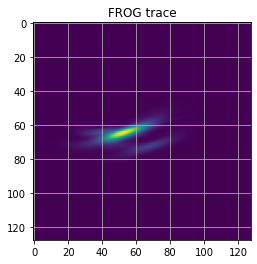

In [32]:
(FROG,delta) = FROGs(0.83363146*1500, 0.6959827*1500 , 0.38027263, 0.93108445, 1.0114049*0.0016 , 0.99448764*0.00025, 1.04794*2902.965)
FROG_trace_plot(FROG)

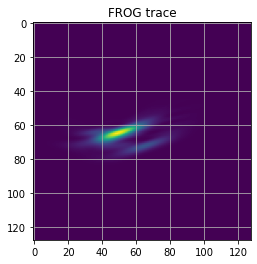

In [34]:
(FROG2,delta) = FROGs(1*1500, 0.66666667*1500, 0.4, 0.9, 1*0.0016, 1*0.00025, 1*2902.965 )
FROG_trace_plot(FROG2)

In [35]:
array_diff(FROG, FROG2)

0.10555429323439945